In [2]:
!pip install geocoder
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 7.6 MB/s  eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

In [67]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


In [68]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [69]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [70]:
neighborhoods_data = newyork_data['features']

In [71]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [72]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [73]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [74]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [75]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [76]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [77]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [78]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [79]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [80]:
CLIENT_ID = 'RCJUSB0OBO1HFHKARQQED3BB3CFQW1H3LVBHPAZCRWX54M1K' # your Foursquare ID
CLIENT_SECRET = '4IZ0EFPUEB24WKHF2MXNE3W0W13BYW4SVEQY4RGSYHCDDTJN' # your Foursquare Secret
VERSION = '20210419' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RCJUSB0OBO1HFHKARQQED3BB3CFQW1H3LVBHPAZCRWX54M1K
CLIENT_SECRET:4IZ0EFPUEB24WKHF2MXNE3W0W13BYW4SVEQY4RGSYHCDDTJN


In [88]:
# create URL
url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
            
results = requests.get(url).json()
#print(results)

categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

{'meta': {'code': 200, 'requestId': '607e04218dd5f01982e58643'}, 'response': {'categories': [{'id': '4d4b7104d754a06370d81259', 'name': 'Arts & Entertainment', 'pluralName': 'Arts & Entertainment', 'shortName': 'Arts & Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'categories': [{'id': '56aa371be4b08b9a8d5734db', 'name': 'Amphitheater', 'pluralName': 'Amphitheaters', 'shortName': 'Amphitheater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'categories': []}, {'id': '4fceea171983d5d06c3e9823', 'name': 'Aquarium', 'pluralName': 'Aquariums', 'shortName': 'Aquarium', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_', 'suffix': '.png'}, 'categories': []}, {'id': '4bf58dd8d48988d1e1931735', 'name': 'Arcade', 'pluralName': 'Arcades', 'shortName': 'Arcade', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/a

In [104]:
def get_venues_count(lat, long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [105]:
brooklyn_venues = brooklyn_data.copy()
for c in categories_list:
    brooklyn_venues[c[0]] = 0
    
brooklyn_venues.head()

,Borough,Neighborhood,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,0,0,0,0,0,0,0,0,0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,0,0,0,0,0,0,0,0,0
2,Brooklyn,Sunset Park,40.645103,-74.010316,0,0,0,0,0,0,0,0,0,0
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,0,0,0,0,0,0,0,0,0
4,Brooklyn,Gravesend,40.595260,-73.973471,0,0,0,0,0,0,0,0,0,0


In [106]:
for i, row in brooklyn_venues.iterrows():
    for c in categories_list:        
        brooklyn_venues.loc[i, c[0]] = get_venues_count(brooklyn_venues.iloc[i].Latitude, 
                                                  brooklyn_venues.iloc[i].Longitude, 
                                                  radius=500, categoryId=c[1])
        
    print('{} ({}, {}) data gathering for is complete'.format(
        brooklyn_venues.iloc[i].Neighborhood, brooklyn_venues.iloc[i].Latitude, 
        brooklyn_venues.iloc[i].Longitude))

Bay Ridge (40.625801065010656, -74.03062069353813) data gathering for is complete
Bensonhurst (40.61100890202044, -73.99517998380729) data gathering for is complete
Sunset Park (40.64510294925429, -74.01031618527784) data gathering for is complete
Greenpoint (40.7302009848647, -73.95424093127393) data gathering for is complete
Gravesend (40.59526001306593, -73.97347087708445) data gathering for is complete
Brighton Beach (40.57682506566604, -73.96509448785336) data gathering for is complete
Sheepshead Bay (40.58689012678384, -73.94318640482979) data gathering for is complete
Manhattan Terrace (40.61443251335098, -73.95743840559939) data gathering for is complete
Flatbush (40.63632589026677, -73.95840106533903) data gathering for is complete
Crown Heights (40.67082917695294, -73.94329119073582) data gathering for is complete
East Flatbush (40.64171776668961, -73.93610256185836) data gathering for is complete
Kensington (40.642381958003526, -73.98042110559474) data gathering for is compl

In [107]:
brooklyn_venues.head()

,Borough,Neighborhood,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Brooklyn,Bay Ridge,40.625801,-74.030621,11,26,7,208,48,75,253,15,201,53
1,Brooklyn,Bensonhurst,40.611009,-73.995180,8,51,8,114,10,43,276,21,201,43
2,Brooklyn,Sunset Park,40.645103,-74.010316,21,38,9,180,15,35,244,12,194,46
3,Brooklyn,Greenpoint,40.730201,-73.954241,55,129,24,121,77,138,288,149,223,65
4,Brooklyn,Gravesend,40.595260,-73.973471,15,93,6,105,20,84,275,35,201,97


In [108]:
from sklearn.preprocessing import MinMaxScaler
X = brooklyn_venues.values[:,4:]
scaled_dataset = MinMaxScaler().fit_transform(X)
brooklyn_scaled = pd.DataFrame(scaled_dataset) 
brooklyn_scaled.columns = [c[0] for c in categories_list]
brooklyn_scaled.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.066667,0.062069,0.078947,1.000000,0.586667,0.298013,0.414414,0.017751,0.207547,0.089431
1,0.026667,0.234483,0.105263,0.416149,0.080000,0.086093,0.621622,0.053254,0.207547,0.008130
2,0.200000,0.144828,0.131579,0.826087,0.146667,0.033113,0.333333,0.000000,0.075472,0.032520
3,0.653333,0.772414,0.526316,0.459627,0.973333,0.715232,0.729730,0.810651,0.622642,0.186992
4,0.120000,0.524138,0.052632,0.360248,0.213333,0.357616,0.612613,0.136095,0.207547,0.447154


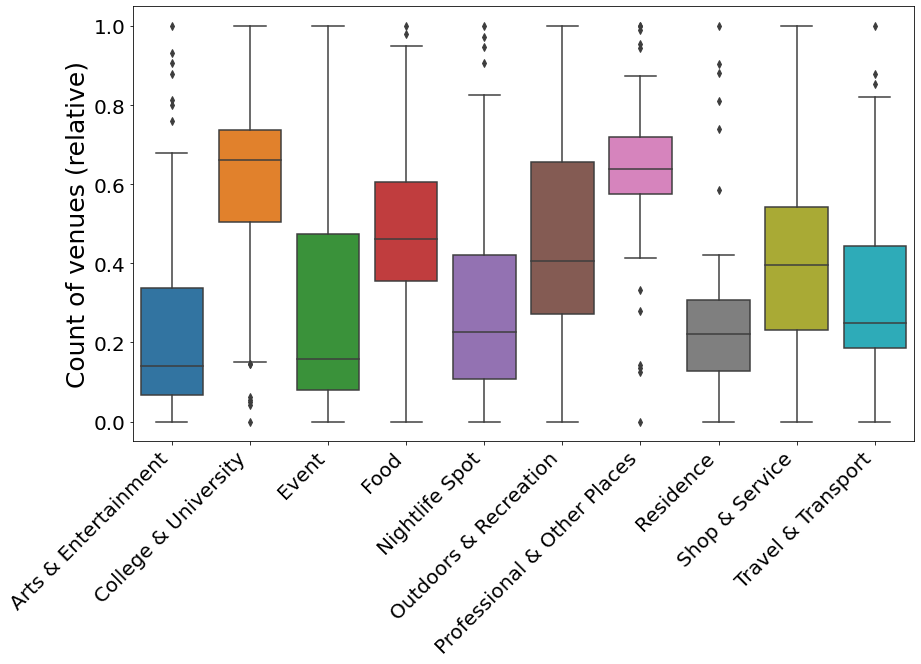

In [109]:
import seaborn as sns
plt.figure(figsize=(14,8))
ax = sns.boxplot(data = brooklyn_scaled)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [111]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_scaled)

kmeans_labels = kmeans.labels_

brooklyn_venues_clustered = brooklyn_venues.copy()
brooklyn_venues_clustered['Cluster'] = kmeans_labels

#dataframe to be used for box plot
brooklyn_scaled_clustered = brooklyn_scaled.copy()
brooklyn_scaled_clustered['Cluster'] = kmeans_labels


In [112]:
brooklyn_scaled_clustered.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster
0,0.066667,0.062069,0.078947,1.000000,0.586667,0.298013,0.414414,0.017751,0.207547,0.089431,3
1,0.026667,0.234483,0.105263,0.416149,0.080000,0.086093,0.621622,0.053254,0.207547,0.008130,3
2,0.200000,0.144828,0.131579,0.826087,0.146667,0.033113,0.333333,0.000000,0.075472,0.032520,3
3,0.653333,0.772414,0.526316,0.459627,0.973333,0.715232,0.729730,0.810651,0.622642,0.186992,2
4,0.120000,0.524138,0.052632,0.360248,0.213333,0.357616,0.612613,0.136095,0.207547,0.447154,3


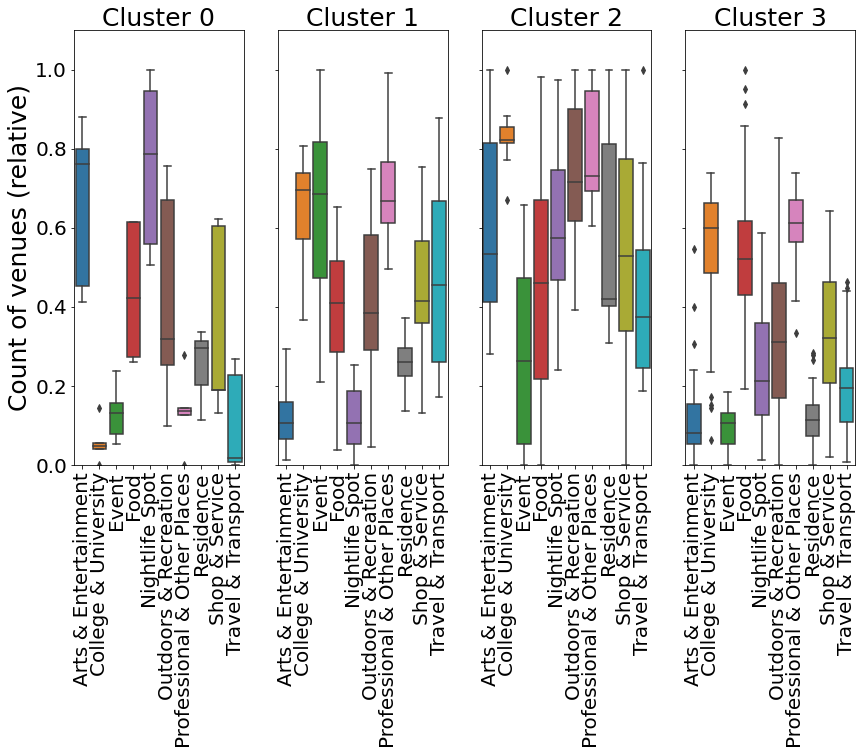

In [113]:
fig,axes= plt.subplots(1,kclusters,figsize=(14,8),sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = brooklyn_scaled_clustered[brooklyn_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [115]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_venues['Latitude'], brooklyn_venues['Longitude'], brooklyn_venues['Neighborhood'], brooklyn_scaled_clustered['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters